In [19]:

import ee
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [20]:
ee.Initialize(project='ee-bhatia-research')

In [21]:
df =  pd.read_csv("./Contract Pricing/Contracts Pricing - December 24.csv")
df['Date'] = pd.to_datetime(df['Date'], format="%b %d, %Y")
dates = df['Date']


In [22]:
#collection of land coverage

# Land surface temp.
lst = ee.ImageCollection("JAXA/GCOM-C/L3/LAND/LST/V3")
veg_index = ee.ImageCollection("MODIS/061/MOD13A1")


In [23]:
def get_temperature(date, state_geometry):
    lst = ee.ImageCollection("JAXA/GCOM-C/L3/LAND/LST/V3") \
            .filterDate(date, date.advance(1, 'day')) \
            .mean() \
            .select('LST_AVE')
    temp = lst.reduceRegion(reducer=ee.Reducer.mean(), geometry=state_geometry, scale=1000).get('LST_AVE').getInfo()
    return temp



In [24]:
def get_evi(date, county_geometry):
    evi_collection = ee.ImageCollection("MODIS/061/MOD13A1") \
                        .filterDate(date, date.advance(1, 'day')) \
                        .select('EVI')
    evi_mean = evi_collection.mean().reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=county_geometry,
        scale=500  # MODIS EVI resolution is 500 meters
    ).get('EVI').getInfo()
    return evi_mean

In [25]:
counties_gdf = gpd.read_file('usa-with-county-boundaries_1127.geojson')
print(counties_gdf)
states_to_keep = ['IL', 'MN', 'IN','IA','NE','KS','MI','OH','MO','SD']
counties_gdf =  counties_gdf[counties_gdf['STATE'].isin(states_to_keep)]


         id                  name STATE         TYPE CNTRY  \
0     02090  Fairbanks North Star    AK      Borough   USA   
1     02130     Ketchikan Gateway    AK      Borough   USA   
2     02282               Yakutat    AK      Borough   USA   
3     02158              Kusilvak    AK  Census Area   USA   
4     02180                  Nome    AK  Census Area   USA   
...     ...                   ...   ...          ...   ...   
3137  56037            Sweetwater    WY       County   USA   
3138  56039                 Teton    WY       County   USA   
3139  56041                 Uinta    WY       County   USA   
3140  56043              Washakie    WY       County   USA   
3141  56045                Weston    WY       County   USA   

                                               geometry  
0     POLYGON ((-144.06900 64.68300, -144.15100 64.6...  
1     MULTIPOLYGON (((-131.49800 54.93500, -131.4670...  
2     POLYGON ((-141.00200 60.39200, -141.00200 60.3...  
3     MULTIPOLYGON (((-

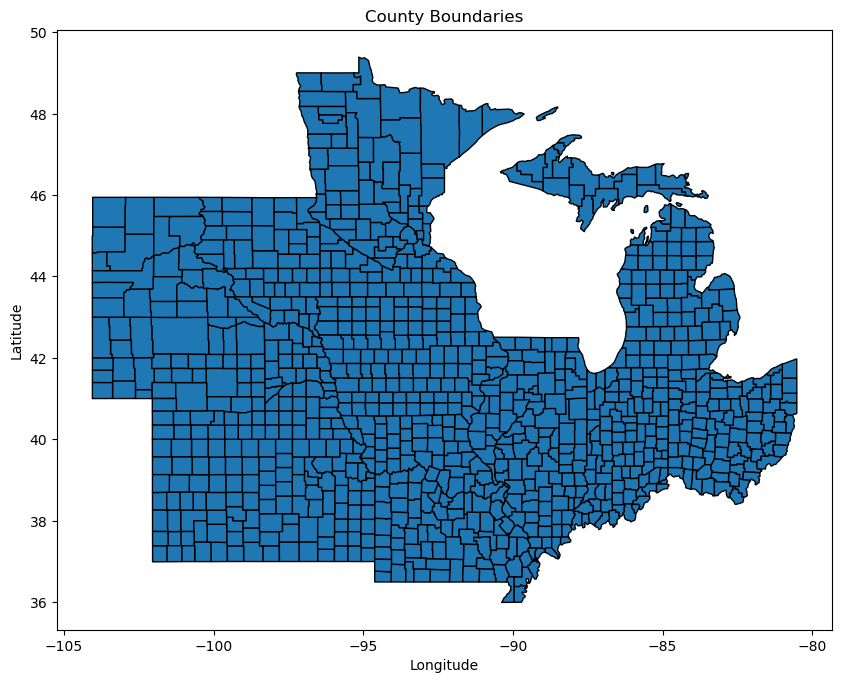

In [30]:
counties_gdf.plot(figsize=(10, 10), edgecolor='black')
plt.title('County Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
